In [6]:
import numpy as np
import matplotlib.pyplot as plt
import IPython

import numpy as np
import os
from IPython.display import Image as Image2
from numpy import genfromtxt 
import pickle
from IPython import embed
from PIL import Image, ImageDraw, ImageFont 

import seaborn as sn
import pandas as pd
%matplotlib inline
from scipy import ndimage
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
import matplotlib.patches as mpatches
from collections import Counter

In [3]:
my_data = genfromtxt('../data/DominicaCodas.csv', delimiter=',',dtype=None,encoding="utf8")
my_data[0,:]

array(['\ufeffcodaNUM2018', 'Date', 'nClicks', 'Duration', 'ICI1', 'ICI2',
       'ICI3', 'ICI4', 'ICI5', 'ICI6', 'ICI7', 'ICI8', 'ICI9', 'CodaType',
       'Clan', 'Unit', 'UnitNum', 'IDN'], dtype='<U12')

In [4]:
c_types = []

for i in range(1,my_data.shape[0]):
    curr_clan = my_data[i,-4]
    
    if curr_clan=="EC1":
        c_types.append(my_data[i,-5])

In [7]:
Counter(c_types)

Counter({'5R3': 19,
         '4R1': 82,
         '5R1': 1510,
         '6i': 182,
         '6-NOISE': 167,
         '7i': 145,
         '7D1': 171,
         '8-NOISE': 10,
         '8i': 178,
         '8R': 41,
         '9-NOISE': 14,
         '9R': 20,
         '4R2': 303,
         '1+1+3': 3574,
         '5-NOISE': 227,
         '9i': 135,
         '3-NOISE': 13,
         '4-NOISE': 38,
         '3D': 61,
         '2+3': 77,
         '1+31': 51,
         '10i': 52,
         '4D': 219,
         '5R2': 287,
         '3R': 21,
         '10R': 11,
         '8D': 20,
         '7D2': 35,
         '6R': 3,
         '7-NOISE': 10,
         '1+32': 71,
         '10-NOISE': 9,
         '1-NOISE': 8,
         '2-NOISE': 6})

In [14]:
rhythm = {'1+1+3':5,
 '1+31':4,
 '1+32':4,
 '1-NOISE':-1,
 '10-NOISE':-1,
 '10R':16,
 '10i':17,
 '2+3':7,
 '2-NOISE':-1,
 '3-NOISE':-1,
 '3D':0,
 '3R':1,
 '4-NOISE':-1,
 '4D':2,
 '4R1':3,
 '4R2':3,
 '5-NOISE':-1,
 '5R1':6,
 '5R2':6,
 '5R3':6,
 '6-NOISE':-1,
 '6R':8,
 '6i':9,
 '7-NOISE':-1,
 '7D1':10,
 '7D2':10,
 '7i':11,
 '8-NOISE':-1,
 '8D':12,
 '8R':12,
 '8i':13,
 '9-NOISE':-1,
 '9R':14,
 '9i':15}

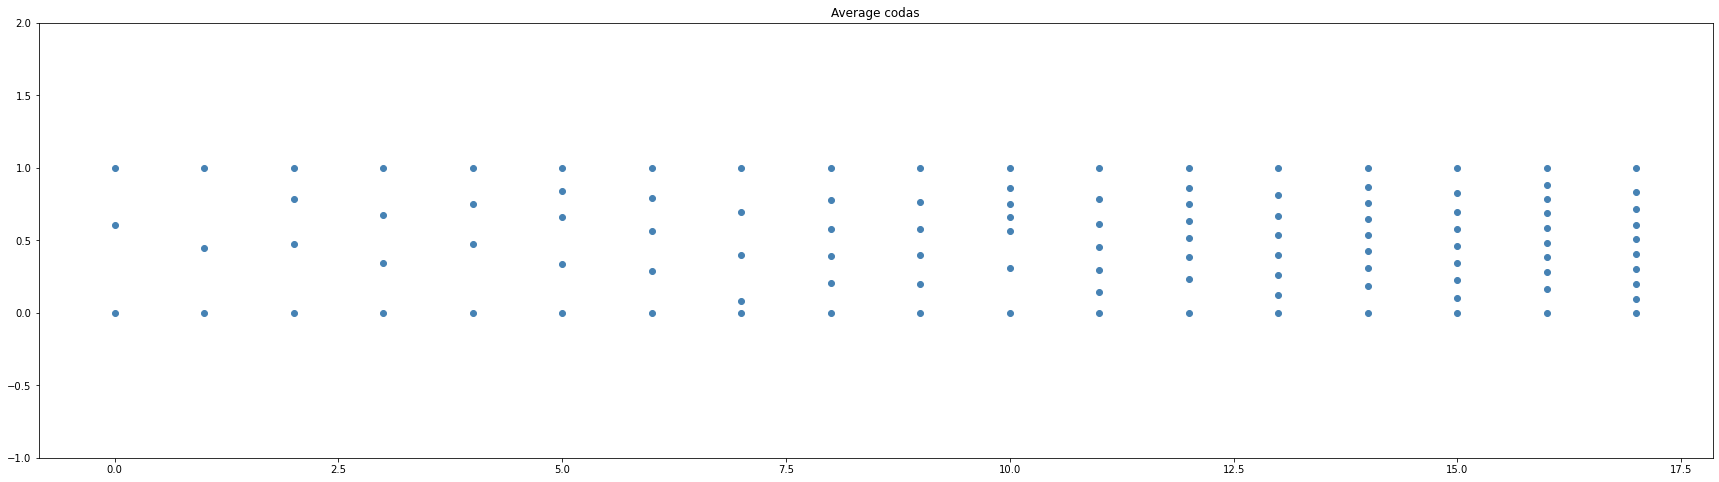

In [18]:
all_rhythms = []
mean_codas = []
all_types = set(c_types)
def return_relative(idx):
    n_clicks = my_data[idx,2].astype(int)
    rel_ICI = []
    rel_ICI.append(0)
    for t in range(5,4+n_clicks):
        rel_ICI.append(np.sum(my_data[idx,4:t].astype(float)))
    return rel_ICI

fig = plt.figure(figsize=(30, 8))
for ctype in all_types:
    rhy = rhythm[ctype]
#     print(ctype,rhy)
    if rhy!=-1 and rhy not in all_rhythms:
        all_rhythms.append(rhy)
        relative_ICI_vect = []
        for i in range(1,my_data.shape[0]):
            curr_clan = my_data[i,-4]
            if curr_clan=="EC1" and my_data[i,-5]==ctype:
                if max(return_relative(i))!=0:
                    relative_ICIs = return_relative(i)/max(return_relative(i))
                    if len(relative_ICI_vect)==0 or len(relative_ICI_vect[-1])==len(relative_ICIs):
                        relative_ICI_vect.append(relative_ICIs)
                        x = len(relative_ICIs)*[rhy]
#         print(len(x),len(np.mean(np.array(relative_ICI_vect),0)))
        plt.scatter(x,np.mean(np.array(relative_ICI_vect),0),color='steelblue')
        mean_codas.append(np.mean(np.array(relative_ICI_vect),0))
plt.ylim(-1,2)
plt.title('Average codas')
plt.show()

In [9]:
# Plot the dendrogram visualization of the codas

In [19]:
import scipy.cluster.hierarchy as sch

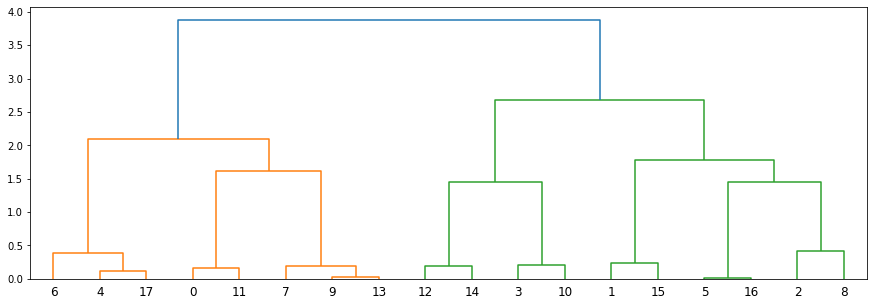

In [21]:
new_codas = []

for i in range(len(mean_codas)):
    new_codas.append(list(mean_codas[i])+(10-len(mean_codas[i]))*[0])
    
X = np.array(new_codas)
Z = sch.linkage(X, method='ward')
fig = plt.figure(figsize=(15, 5))
dn = sch.dendrogram(Z,)
# plt.show()